# Step 1 – Exploratory Data Analysis


## 1 A Make sure the file is in the right place
1. In the VS Code Explorer panel, right-click the project root → New Folder → name it data.
2. Drag-and-drop data.csv from Finder/Explorer into that data/ folder (or copy it there in a terminal).


## 1 B Create & open the first notebook
Explorer sidebar → right-click notebooks → New File → 01_eda.ipynb.

Top-right kernel picker → choose Python (asteroid-ml).

Add a Markdown cell at the very top:
" # Step 1 – Exploratory Data Analysis "


## 1 C Import the essential libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting looks nicer with this one tweak:
plt.rcParams["figure.figsize"] = (6, 3)

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)



## 1 D Load the raw CSV

In [3]:
df_raw = pd.read_csv("../data/data.csv")

# Many Kaggle-style exports carry an unnamed first column (row index) — drop it if present
if "Unnamed: 0" in df_raw.columns:
    df_raw = df_raw.drop(columns=["Unnamed: 0"])

df_raw.shape


(8397, 31)

## 1 E Remove rows where the target (diameter) is missing

In [5]:
df = df_raw[df_raw["diameter"].notna()].reset_index(drop=True)
df.shape


(1436, 31)

ML models need a target for every training example, so rows missing the target must be dropped or predicted separately.

## 1 F Inspect the dataframe structure

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            146 non-null    object 
 1   a               1436 non-null   float64
 2   e               1436 non-null   float64
 3   i               1436 non-null   float64
 4   om              1436 non-null   float64
 5   w               1436 non-null   float64
 6   q               1436 non-null   float64
 7   ad              1436 non-null   float64
 8   per_y           1436 non-null   float64
 9   data_arc        1435 non-null   float64
 10  condition_code  1436 non-null   object 
 11  n_obs_used      1436 non-null   int64  
 12  H               1429 non-null   float64
 13  neo             1436 non-null   object 
 14  pha             1436 non-null   object 
 15  diameter        1436 non-null   float64
 16  extent          0 non-null      float64
 17  albedo          1420 non-null   f

Diameter is float64 → that’s our regression target.

Most physical-orbital columns (a, e, i, etc.) are numeric.

A handful (class, spec_B, spec_T, neo, pha) are object (categorical).

Several columns (e.g. IR, G, GM, extent) show 1436 non-null = 0 → we’ll drop them later.

## 1 G Quantify missing values

In [10]:
missing = (
    df.isna()
      .sum()
      .sort_values(ascending=False)
      .to_frame("n_missing")
)
missing["ratio"] = (missing["n_missing"] / len(df)).round(3)
missing.head(10)


,n_missing,ratio
extent,1436,1.000
GM,1436,1.000
IR,1436,1.000
G,1436,1.000
UB,1431,0.997
spec_T,1430,0.996
BV,1430,0.996
spec_B,1429,0.995
rot_per,1316,0.916
name,1290,0.898


Columns with 100 % missing (IR, G, GM, extent) carry no information → mark for removal.

Columns with >99 % missing (UB, spec_B, spec_T) are also poor predictors.

Most useful numeric features are >95 % complete.

## 1 H Look at the target distribution

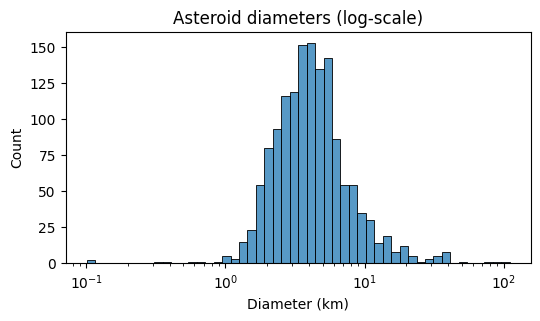

In [11]:
sns.histplot(df["diameter"], bins=50, log_scale=True)
plt.xlabel("Diameter (km)")
plt.title("Asteroid diameters (log-scale)")
plt.show()


Distribution is highly right-skewed — many small rocks, few giants.

Taking log(diameter) later could stabilise variance for linear models.

Tree-based models cope fine without the transform, but the diagnostic is still useful.

## 1 I Save a clean snapshot (nice practice for team projects)

In [12]:
df.to_csv("../data/asteroids_clean.csv", index=False)

In [14]:
!git add data/asteroids_clean.csv notebooks/01_eda.ipynb
!git commit -m "Step 1: initial EDA (shape, missing, target histogram)"
!git push origin main   # if you already have a remote repo

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
